<a href="https://colab.research.google.com/github/pansy-2022/2022start/blob/main/5%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C_%EA%B0%9C%EC%9D%B8%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 지하철 승하차 데이터를 활용하여 궁금증 해소하기

활용한 데이터 (서울시 교통공사 데이터)
: https://data.seoul.go.kr/dataList/OA-12921/F/1/datasetView.do#

궁금증

1) 출근 시간 or 퇴근 시간 가장 붐비는 역은 어디지?

2) 원하는 역을 입력하면 10년 전과 지금의 승하차 인원 정보 알 수 있을까?




**1) 출근 시간과 퇴근 시간 가장 붐비는 지역 알아보기 (2021년 자료 활용하기)**

1) 데이터 업로드 확인하기

In [1]:
ls

metro2011.csv  metro2021.csv  sample_data/


2) 한글 폰트 세팅하기

In [2]:
!apt-get install fonts-nanum -qq > /dev/null
!fc-cache -fv
import matplotlib as mpl
mpl.font_manager._rebuild()
findfont = mpl.font_manager.fontManager.findfont
mpl.font_manager.findfont = findfont
mpl.backends.backend_agg.findfont = findfont

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


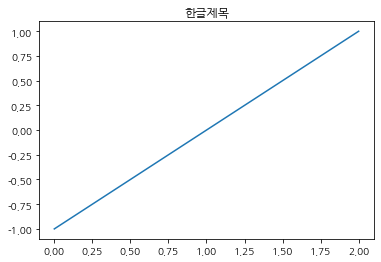

In [3]:
import matplotlib.pyplot as plt
plt.rc('font', family = 'NanumGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.title('한글제목')
plt.plot([-1,0,1])
plt.show()

**문제해결과정**

1) 출근 시간과 퇴근 시간 정의하기 : 7:00~9:00, 17:00~19:00

2) 출근 시간 인원 누적해서 더하기 (퇴근 시간 인원도 누적해서 더하기) 

3) 누적해서 더한 값 저장하기

4) 저장 후 값이 가장 큰 역 도출하기


In [26]:
import csv
data = csv.reader(open('metro2021.csv',encoding = 'CP949'))


next(data)

a = 0
b = 0
c = 0
d = 0
name_m = ''
name_n = ''

for row in data :
  if row[5] =='승차':
    a = int(row[8]) + int(row[9])
    if a > b :
      b = a
      name_m = row[4]
  if row[5] == '하차' :
    c = int(row[18]) + int(row[19])
    if c > d :
      d = c
      name_n = row[4]

print(f'{name_m}(역)이 {b}명으로 출근 시간에 제일 붐빕니다. ')

print(f'{name_n}(역)이 {d}명으로 퇴근 시간에 제일 붐빕니다. ')




신림(역)이 22364명으로 출근 시간에 제일 붐빕니다. 
잠실(송파구청)(역)이 17385명으로 퇴근 시간에 제일 붐빕니다. 


**2) 원하는 역을 입력하여 10년 전과 지금의 승하차 인원 변화 알아보기(2021년, 2011년 자료 활용하기)**

1) 원하는 지역 input으로 입력 받기

2) 원하는 지역의 2021년 자료와 2011년 자료 각각 리스트에 저장하기

3) 각각 출력하기

4) 증설된 역이 있어 값의 변화를 알기 힘든 경우에는? 

궁금점: '서울역'과 '서울'이라고 되어 있는 경우 두 개 다 서울역으로 받으려면 어떻게 해야하지?ㅠㅠ



In [11]:
import csv
data1 = csv.reader(open('metro2021.csv',encoding = 'CP949'))
data2 = csv.reader(open('metro2011.csv',encoding = 'CP949'))
next(data1)
next(data2)

station = input('원하는 역을 입력해주세요. ex)______역 : ')

if station == '서울' :
  station = '서울역'
  
a = []
b = []
for row in data1 :
  if station == row[4]  :
    a.append(int(row[25]))

for row in data2 :
  if station == row[4] :
    b.append(int(row[25]))

if sum(a)-sum(b) == 0 :
  print(f'{station}은 증설된 역이기 때문에 변화가 없습니다.')
else :
  print(f'{station}의 승하차 인원 변화 : {sum(a)-sum(b)}')




원하는 역을 입력해주세요. ex)______역 : 김포공항
김포공항의 승하차 인원 변화 : 4803625
